# Case study on Supervised learning

Do the following in the iris dataset.

  1)Read the dataset to the python environment.
  
  2)Do necessary pre-processing steps. 
  
  3)Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

In [725]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1)Read the dataset to the python environment.

In [726]:
# Loading the data file into the pandas dataframe.

iris = pd.read_excel(r'C:\Users\Aneesh\Downloads\iris (1).xls')
iris

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# 2)Do necessary pre-processing steps.

In [727]:
# Checking data summary
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [728]:
#descriptive statistics of columns
iris.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [729]:
# Checking for data types
iris.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

In [730]:
iris.shape

(150, 5)

In [731]:
# Checking for null values
iris.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

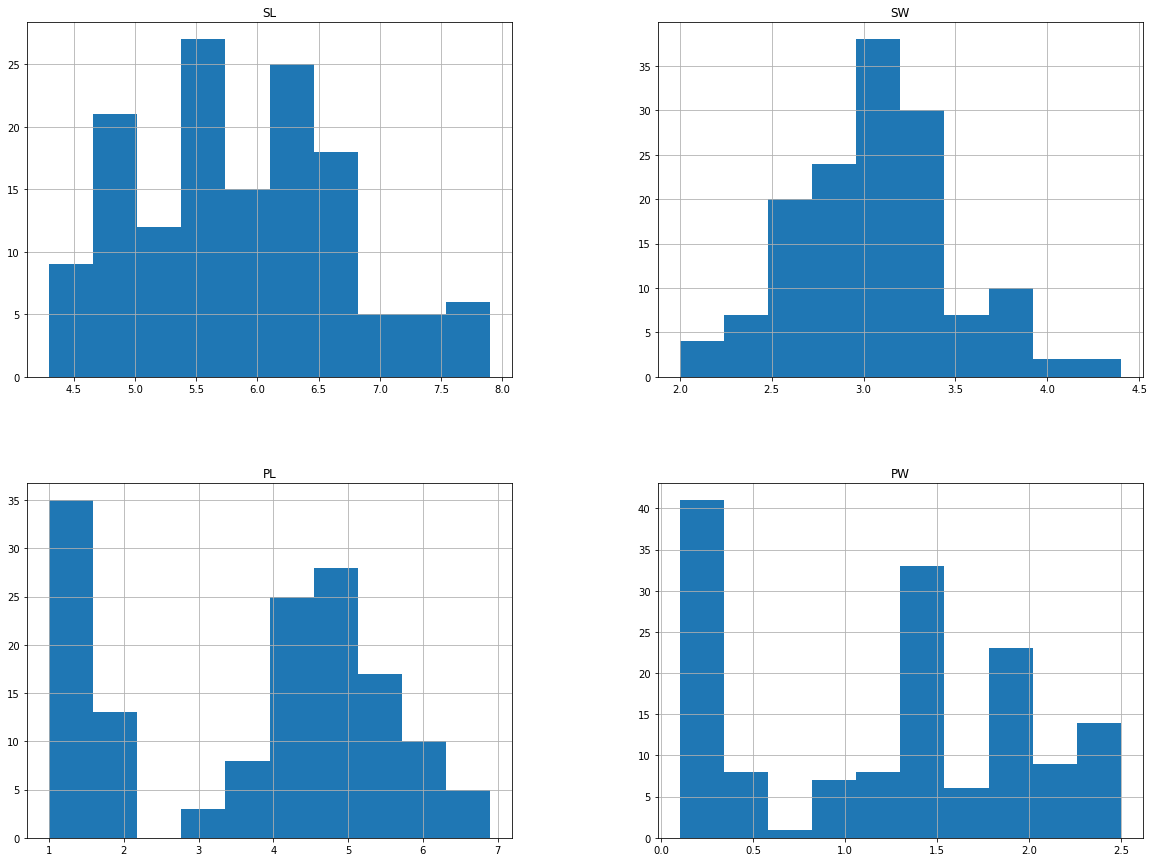

In [732]:
# Checking for skewness of data
skew = iris.select_dtypes(include = 'float')
skew.hist(figsize=(20,15))
plt.show()

# i)Handling the null values

In [733]:
for i in ['SL', 'SW', 'PL']:
    iris[i] = iris[i].fillna(iris[i].median())
iris.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

# ii)Handling the outliers

Text(0.5, 1.0, 'SL, SW, PL, PW')

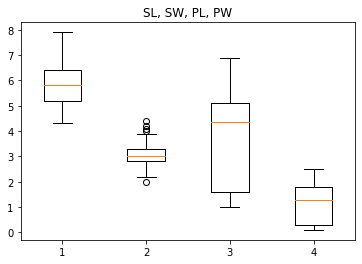

In [734]:
# Checking for outliers
plt.boxplot(iris[['SL','SW','PL','PW']])
plt.title('SL, SW, PL, PW')

There are outliers in sepal width[SW] only. Other parameters have no outliers

In [735]:
# using inter quartile range (IQR) to manage outliers.
# Normally the datapoints which fall below Q1-1.5(iqr) and above Q3+1.5(iqr) are considered as outliers.

Q1 = np.percentile(iris['SW'],25, interpolation = 'midpoint')
Q2 = np.percentile(iris['SW'],50, interpolation = 'midpoint')
Q3 = np.percentile(iris['SW'],75, interpolation = 'midpoint')
IQR = Q3-Q1
up_li = Q3 + 1.5 * IQR
lo_li = Q1 - 1.5 * IQR
print("lower limit is :",lo_li)
print("upper limit is :",up_li)

lower limit is : 2.1249999999999996
upper limit is : 3.9250000000000003


In [736]:
# Finding outlier values in the column
outlier = []
for x in iris['SW']:
    if ((x < lo_li) or (x > up_li)):
        outlier.append(x)
print("outliers in SW are :",outlier)

outliers in SW are : [4.0, 4.4, 4.1, 4.2, 2.0]


In [737]:
ind_u = iris['SW'] > up_li
iris.loc[ind_u].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [738]:
ind_l = iris['SW'] < lo_li
iris.loc[ind_l].index

Int64Index([60], dtype='int64')

In [739]:
# dropping all the outliers
# we can drop it using .drop function
# no need to specify the axis because it is actually present in rows
iris.drop([14, 15, 32, 33,60],inplace=True)

Text(0.5, 1.0, 'Box plot of sepal width after removing outliers')

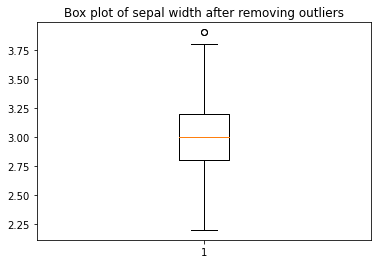

In [740]:
# Box plot
plt.boxplot(iris['SW'])
plt.title('Box plot of sepal width after removing outliers')

# iii)Encoding

In [741]:
# Encoding - process of converting data from one form to another

In [742]:
iris.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [743]:
iris.Classification.nunique()

3

In [744]:
# one hot encoding

iris_enco = pd.get_dummies(iris)
iris_enco 

,SL,SW,PL,PW,Classification_Iris-setosa,Classification_Iris-versicolor,Classification_Iris-virginica
0,5.1,3.5,1.40,0.2,1,0,0
1,4.9,3.0,1.40,0.2,1,0,0
2,5.8,3.2,1.30,0.2,1,0,0
3,4.6,3.1,1.50,0.2,1,0,0
4,5.0,3.6,1.40,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,0,0,1
146,6.3,2.5,5.00,1.9,0,0,1
147,6.5,3.0,4.35,2.0,0,0,1
148,6.2,3.4,5.40,2.3,0,0,1


# iv)Splitting and scaling the data set

In [745]:
# Splitting the data set into features and targets
# We will take Classification as the target variable (ie, y) and all the others as feature variable (x)

y = iris['Classification']
x = iris.drop(['Classification'],axis = 1)

In [746]:
# Scaling the dataset
from sklearn import preprocessing
min_max = preprocessing.MinMaxScaler(feature_range=(0,1))
x = min_max.fit_transform(x)
x = pd.DataFrame(x)
x.head()

,0,1,2,3
0,0.222222,0.764706,0.067797,0.041667
1,0.166667,0.470588,0.067797,0.041667
2,0.416667,0.588235,0.050847,0.041667
3,0.083333,0.529412,0.084746,0.041667
4,0.194444,0.823529,0.067797,0.041667


In [747]:
x

,0,1,2,3
0,0.222222,0.764706,0.067797,0.041667
1,0.166667,0.470588,0.067797,0.041667
2,0.416667,0.588235,0.050847,0.041667
3,0.083333,0.529412,0.084746,0.041667
4,0.194444,0.823529,0.067797,0.041667
...,...,...,...,...
140,0.666667,0.470588,0.711864,0.916667
141,0.555556,0.176471,0.677966,0.750000
142,0.611111,0.470588,0.567797,0.791667
143,0.527778,0.705882,0.745763,0.916667


In [748]:
# Our feature set is now scaled, all the values lies between 0 and 1
# Now let's split our data for training and testing
from sklearn.model_selection import train_test_split
# Creating instance
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 42, test_size = 0.1)

In [749]:
x_train.shape

(130, 4)

In [750]:
x_test.shape

(15, 4)

In [751]:
y_train.shape

(130,)

In [752]:
y_test.shape

(15,)

# 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

In [753]:
#Let's try by building different models and find the best one by  checking the accuracy score of each.
# split the data set and create the model

# i)Logistic Regression

In [754]:
# Creating a Logisticmodel

from sklearn.linear_model import LogisticRegression
lo_model = LogisticRegression()
lo_model.fit(x_train,y_train)
y_pred = lo_model.predict(x_test)

In [755]:
# testing the accuracy of the model
from sklearn.metrics import accuracy_score
lo_acc = accuracy_score(y_test,y_pred)
print("Accuracy of logistic model is :", lo_acc)

Accuracy of logistic model is : 0.9333333333333333


# ii)SVM

In [756]:
# linear classifier
from sklearn.svm import SVC
svm_linear = SVC(kernel='linear')
svm_linear.fit(x_train, y_train)
y_predi = svm_linear.predict(x_test)
svml_acc = accuracy_score(y_test,y_predi)
print("The accuracy score using linear svm is ",svml_acc)

The accuracy score using linear svm is  0.9333333333333333


In [757]:
# Standardising the features

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_trainsc = sc.fit_transform(x_train)
x_testsc = sc.fit_transform(x_test)

In [758]:
svm_linsc = SVC(kernel ='linear')
svm_linsc.fit(x_trainsc,y_train)
y_predsc = svm_linsc.predict(x_testsc)

In [759]:
svmlsc_acc = accuracy_score(y_test,y_predsc)
print('The accuracy score using linear svm after scaling is', svmlsc_acc)

The accuracy score using linear svm after scaling is 0.9333333333333333


# iii)Random Forest

In [760]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print('Accuracy of Random forest is', accuracy_score(y_test,y_pred))

Accuracy of Random forest is 0.8666666666666667


# iv)knn

In [761]:
from sklearn.neighbors import KNeighborsClassifier
acc_values = []
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski')
    classifier.fit(x_train, y_train)
    y_prediction = classifier.predict(x_test)
    acc= accuracy_score(y_test, y_prediction)
    acc_values.append(acc)
acc_values

[0.8666666666666667,
 0.8666666666666667,
 0.8666666666666667,
 0.8666666666666667,
 0.8666666666666667,
 0.8666666666666667,
 0.8666666666666667,
 0.8666666666666667,
 0.8666666666666667,
 0.8666666666666667,
 0.8666666666666667,
 0.8666666666666667]

In [762]:
classifier = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski')
classifier.fit(x_train, y_train)
y_prediction = classifier.predict(x_test)
print("Accuracy for knn model is", accuracy_score(y_test,y_prediction))

Accuracy for knn model is 0.8666666666666667


In [763]:
#for any k value accuracy is 86%

observations:

    Accuracy of logistic model is : 0.9333333333333333.
    
    The accuracy score using linear svm after scaling is 0.9333333333333333.
    
    Accuracy of Random forest is 0.8666666666666667.
    
    Accuracy for knn model is 0.8666666666666667.
    
from these it's clear that for the given data set logistic model and svm model are the best models with 93% accuracy.